In [33]:
import pandas as pd
import openpyxl as xl
import csv as csv
import os as os
import matplotlib.pyplot as plt
import numpy as np


In [34]:
#import excel file with erp_per_lga
excel_file ='2021_ERP_2006_2021.xlsx'
erp_vic = pd.read_excel(excel_file)
erp_vic_df = pd.DataFrame(erp_vic)
erp_vic_df.head()

,Unnamed: 0,Unnamed: 1,2016,2017,2018,2019,2020,2021
0,20110,Alpine,12578,12679,12807,12884,13028,13156
1,20260,Ararat,11745,11790,11792,11822,11896,11821
2,20570,Ballarat,103500,105498,107518,109650,111476,113482
3,20660,Banyule,127447,128601,129548,130478,130121,127376
4,20740,Bass Coast,33464,34726,36041,37382,38869,40641


In [35]:

#define function to caculate compound annual growth rate
def calculate_cagr(start_value, end_value, period):
    return(end_value / start_value)**(1/period)-1

#add new column and using assign() and calculate average growth

erp_vic_df = erp_vic_df.assign(cagr = calculate_cagr(erp_vic_df.iloc[:,2], erp_vic_df.iloc[:,7 ], period=5))
#rename first 2 columns and the column headed cagr and fornmat the column


erp_vic_df = erp_vic_df.rename(columns = {'Unnamed: 0': 'abs_code', 'Unnamed: 1':'lga', 'cagr' : 'annual_growth %'})
erp_vic_df['annual_growth %']= erp_vic_df['annual_growth %'].astype(float)
erp_vic_df['annual_growth %']= erp_vic_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
erp_vic_df.head()

,abs_code,lga,2016,2017,2018,2019,2020,2021,annual_growth %
0,20110,Alpine,12578,12679,12807,12884,13028,13156,0.90%
1,20260,Ararat,11745,11790,11792,11822,11896,11821,0.13%
2,20570,Ballarat,103500,105498,107518,109650,111476,113482,1.86%
3,20660,Banyule,127447,128601,129548,130478,130121,127376,-0.01%
4,20740,Bass Coast,33464,34726,36041,37382,38869,40641,3.96%


In [36]:
#import excel file with gp_full_time_equivalent per remote area classification

excel_file ='summary2_GPs for Victoria.xlsx'
gptfe = pd.read_excel(excel_file,'gptfe')
gptfe_vic_df = pd.DataFrame(gptfe)
gptfe_vic_df

,Unnamed: 0,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,5-year CAGR
0,MM1,5144.3,5353.0,5602.3,5798.1,5942.4,5970.2,6449.5,0.037972
1,MM2,413.3,430.1,443.2,447.6,448.2,473.9,510.5,0.034869
2,MM3,397.7,400.0,398.8,398.5,394.5,403.8,416.0,0.007875
3,MM4,344.7,352.0,368.1,375.3,386.2,399.8,416.7,0.034323
4,MM5,291.1,294.3,302.5,311.1,314.7,327.9,347.0,0.033494
5,MM6,2.7,2.2,2.3,2.8,2.7,3.0,3.2,0.077818
6,GP FULL TIME EQUIVALENT (GPFTE),6593.8,6831.6,7117.2,7333.2,7488.7,7578.7,8143.0,0.035744


In [37]:
gptfe_vic_df = gptfe_vic_df.rename(columns = {'Unnamed: 0':  'classification'} )
gptfe_vic_df = gptfe_vic_df.rename(columns = {'5-year CAGR' : 'annual_growth %'})
gptfe_vic_df['annual_growth %']= gptfe_vic_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))


gptfe_vic_df.head(5) 

,classification,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,annual_growth %
0,MM1,5144.3,5353.0,5602.3,5798.1,5942.4,5970.2,6449.5,3.80%
1,MM2,413.3,430.1,443.2,447.6,448.2,473.9,510.5,3.49%
2,MM3,397.7,400.0,398.8,398.5,394.5,403.8,416.0,0.79%
3,MM4,344.7,352.0,368.1,375.3,386.2,399.8,416.7,3.43%
4,MM5,291.1,294.3,302.5,311.1,314.7,327.9,347.0,3.35%


In [38]:
excel_file ='summary2_GPs for Victoria.xlsx'
gp_service = pd.read_excel(excel_file,'gp_service')
gp_service_df = pd.DataFrame(gp_service)
gp_service_df = gp_service_df.dropna(how ='any')
gp_service_df = gp_service_df.rename(columns = {'5-year CAGR' : 'annual_growth %'})
gp_service_df['annual_growth %']= gp_service_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
gp_service_df

,Service type,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,annual_growth %
0,Non-referred attendances GP/VR GP ...,32164983,33176743,34464453,35337673,36994524,39312579,45315453,6.43%
1,Non-referred attendances - Other ...,2096755,2038317,1882286,1912670,1785713,1559100,1319826,-8.33%
2,Specialist attendances ...,93107,88259,86778,90576,76674,73083,71413,-4.15%
3,Obstetrics ...,140190,139781,145806,154671,147472,154448,127610,-1.81%
4,Anaesthetics ...,84344,80933,80266,84497,72355,71939,69573,-2.98%
5,Pathology Tests ...,130168,126524,127237,121523,104039,72817,58210,-14.38%
6,Diagnostic Imaging ...,4584,4194,3901,3286,2846,1599,1663,-16.89%
7,Operations ...,550119,556362,583069,575289,530085,555522,517917,-1.42%
8,Assistance at Operations ...,2624,2769,2459,2861,2619,2751,2355,-3.19%
10,Other MBS Services ...,227898,237933,245638,252140,242387,163962,165907,-6.96%


In [39]:
excel_file ='summary2_GPs for Victoria.xlsx'
sevice_region = pd.read_excel(excel_file,'sevice_region')
service_region_df = pd.DataFrame(sevice_region)
service_region_df = service_region_df.dropna(how ='any')
service_region_df = service_region_df.rename(columns = {'area type':'clssification', 'cagr' : 'annual_growth %'})
service_region_df['annual_growth %']= service_region_df['annual_growth %'].astype(float)
service_region_df['annual_growth %'] = service_region_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
service_region_df

,clssification,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,annual_growth %
0,MM1,29969009,31026450,32322055,33350096,34720441,36354701,40808415,5.63%
1,MM2,2390882,2461693,2522969,2539935,2584655,2836821,3129795,4.92%
3,MM4,NP,2061870,2139383,2164996,2270140,2445436,2644810,5.11%
4,MM5,1662770,1672936,1701753,1733290,1774722,1925885,2158443,5.23%


In [40]:
excel_file ='summary2_GPs for Victoria.xlsx'
patient_age = pd.read_excel(excel_file,'patient_age', skiprows = 6)
patient_age_df = pd.DataFrame(patient_age)
#patient_age_df = patient_age_df.dropna(how ='any')
#patient_age_df.rename(columns = patient_age_df.iloc(0))
#patient_age_df = patient_age_df.drop([0])

patient_age_df

,Age,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,cagr
0,00 - 04,321.4,332.8,342.4,352.1,321.4,273.3,288.1,-0.028435
1,05 - 09,194.9,201.3,208.9,212.1,208.0,152.8,187.0,-0.014629
2,10 - 14,156.4,163.0,170.2,173.4,170.8,151.7,188.4,0.029387
3,15 - 19,223.9,225.9,232.3,232.1,229.1,226.4,265.0,0.032443
4,20 - 24,314.3,319.1,322.3,323.7,321.9,315.4,344.0,0.015141
5,25 - 34,861.6,889.9,921.6,946.3,961.8,960.8,1038.1,0.031287
6,35 - 44,840.4,862.4,897.8,929.2,956.1,979.4,1094.3,0.048783
7,45 - 54,870.9,897.3,930.7,943.5,955.1,985.3,1043.4,0.030630
8,55 - 64,878.1,909.4,952.6,973.2,992.5,1042.4,1092.8,0.037426
9,65 - 74,866.9,911.9,964.8,998.8,1033.2,1106.8,1153.8,0.048182


In [41]:

patient_age_df = patient_age_df.rename(columns = {'cagr' : 'annual_growth %'})
patient_age_df['annual_growth %']= patient_age_df['annual_growth %'].astype(float)
patient_age_df['annual_growth %'] = patient_age_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
patient_age_df

,Age,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,annual_growth %
0,00 - 04,321.4,332.8,342.4,352.1,321.4,273.3,288.1,-2.84%
1,05 - 09,194.9,201.3,208.9,212.1,208.0,152.8,187.0,-1.46%
2,10 - 14,156.4,163.0,170.2,173.4,170.8,151.7,188.4,2.94%
3,15 - 19,223.9,225.9,232.3,232.1,229.1,226.4,265.0,3.24%
4,20 - 24,314.3,319.1,322.3,323.7,321.9,315.4,344.0,1.51%
5,25 - 34,861.6,889.9,921.6,946.3,961.8,960.8,1038.1,3.13%
6,35 - 44,840.4,862.4,897.8,929.2,956.1,979.4,1094.3,4.88%
7,45 - 54,870.9,897.3,930.7,943.5,955.1,985.3,1043.4,3.06%
8,55 - 64,878.1,909.4,952.6,973.2,992.5,1042.4,1092.8,3.74%
9,65 - 74,866.9,911.9,964.8,998.8,1033.2,1106.8,1153.8,4.82%


In [42]:
excel_file ='pop_remoteness.xlsx'
pop_remoteness = pd.read_excel(excel_file)
pop_remoteness_df = pd.DataFrame(pop_remoteness)
pop_remoteness_df

,Unnamed: 0,Unnamed: 1,2016,2021,Unnamed: 4
0,MMS 1,Major cities,4376630,4779726,403096
1,MMS 2,Inner Regional,1111740,1313162,201422
2,MMS 3,Outer Regional,242899,247603,4704
3,MMS 4,Remote,3352,3564,212


In [43]:
pop_remoteness_df = pop_remoteness_df.rename(columns = {'Unnamed: 0': 'classification', 
                                              'Unnamed: 1' : 'area_type',
                                              'Unnamed: 4': 'difference'})
pop_remoteness_df = pop_remoteness_df.assign(cagr = calculate_cagr(pop_remoteness_df.iloc[:,3], pop_remoteness_df.iloc[:,2 ], period=5))
pop_remoteness_df = pop_remoteness_df.rename(columns = {'cagr' : 'annual_growth %'})
pop_remoteness_df['annual_growth %']= pop_remoteness_df['annual_growth %'].astype(float)
pop_remoteness_df['annual_growth %'] = pop_remoteness_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
pop_remoteness_df


,classification,area_type,2016,2021,difference,annual_growth %
0,MMS 1,Major cities,4376630,4779726,403096,-1.75%
1,MMS 2,Inner Regional,1111740,1313162,201422,-3.28%
2,MMS 3,Outer Regional,242899,247603,4704,-0.38%
3,MMS 4,Remote,3352,3564,212,-1.22%


In [44]:
excel_file ='summary2_GPs for Victoria.xlsx'
patient_nos = pd.read_excel(excel_file,'patient_nos')

In [45]:
def calculate_cagr(start_value, end_value, period):
    return(end_value / start_value)**(1/period)-1

#add new column and using assign() and calculate average growth

patient_nos = patient_nos.assign(cagr = calculate_cagr(patient_nos.iloc[:,2], patient_nos.iloc[:,7 ], period=5))
#rename first 2 columns and the column headed cagr and fornmat the column


patient_nos = patient_nos.rename(columns = {'cagr' : 'annual_growth %'})
patient_nos['annual_growth %']= patient_nos['annual_growth %'].astype(float)
patient_nos['annual_growth %']= patient_nos['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
patient_nos.head()

,age,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,annual_growth %
0,00 - 04,416339,423143,427787,427915,423795,390830,397723,-1.23%
1,05 - 09,344329,351163,362488,372547,375028,321924,368289,0.96%
2,10 - 14,295441,303808,315053,326234,331376,296926,365906,3.79%
3,15 - 19,324290,324537,328405,329285,328657,310532,364539,2.35%
4,20 - 24,372160,374676,376839,377266,373647,345104,379467,0.25%


In [50]:
#bar chart- gp's by remoteness region
excel_file ='summary2_GPs for Victoria.xlsx'
totals = pd.read_excel(excel_file,'totals')
totals_df = pd.DataFrame(totals).set_index('')


totals_df

,Victoria,2016,2017,2018,2019,2020,2021
0,vic (gp nos),6831.60,7117.20,7333.20,7488.70,7578.70,8143.00
1,population,6173172.00,6299798.00,6418168.00,6530852.00,6606149.00,6548040.00
2,"vic (gp/100,000)",110.67,112.98,114.26,114.67,114.72,124.36


TypeError: 'value' must be an instance of str or bytes, not a numpy.float64

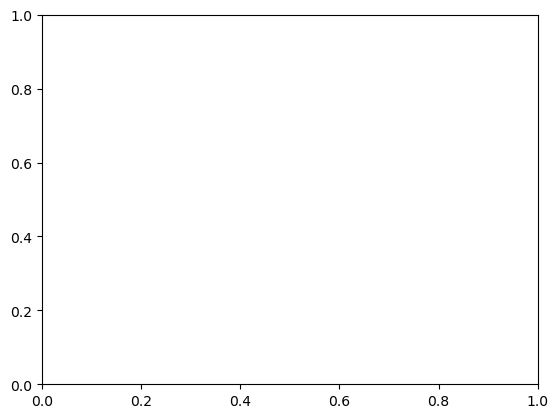

In [56]:
#Bar chart per head of population
x_axis = np.arange(len('vic (gp/100,000)'))
plt.bar(x=totals_df.iloc[0], height =totals_df.iloc[2] )
plt.title("GPs per 100,000 in Victoria")
plt.xlabel("year")
plt.ylabel("TGPs per 100,000")
plt.xticks(rotation = 90)
plt.show()
